In [227]:
# Import the liabraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
from Model import neural_network
from RandomInitialize import initialize
from Prediction import predict
from scipy.optimize import minimize

In [228]:
data = loadmat('./mnist-original.mat')

In [229]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014', '__version__': '1.0', '__globals__': [], 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
      dtype=object), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}


In [230]:
# extracting features from the data file.
X = data['data']
X = X.transpose()

In [231]:
# Normalizing the data
# Since the data is in the image format, the pixes are in the range from 0-255
# By dividing it by 255, I bring it to 0-1
X = X/255

In [232]:
Y = data['label']
Y = Y.flatten()
print(Y)

[0. 0. 0. ... 9. 9. 9.]


In [233]:
X.shape

(70000, 784)

In [234]:
Y.shape

(70000,)

Split the data into test and train.

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape,Y_train.shape,X_test.shape)

(56000, 784) (56000,) (14000, 784)


In [236]:
m = X.shape[0]
input_layer_size = 784 #since the images are 28x28 pixels .
hidden_layer_size = 100
num_labels = 10 #There are 10 classes.

In [237]:
# Randomly Initializing Thetas
init_Theta1 = initialize(hidden_layer_size, input_layer_size)
init_Theta2 = initialize(num_labels, hidden_layer_size)

In [238]:
init_nnparams = np.concatenate((init_Theta1.flatten(), init_Theta2.flatten()))
maxiter = 100
lambda_reg = 0.1  # To avoid overfitting
myargs = (input_layer_size, hidden_layer_size, num_labels, X_train, Y_train, lambda_reg)

In [239]:
results = minimize(neural_network, x0=init_nnparams, args=myargs,
          options={'disp': True, 'maxiter': maxiter}, method="L-BFGS-B", jac = True)
 
nn_params = results["x"]  # Trained Theta is extracted

In [241]:
# Weights are split back to Theta1, Theta2
Theta1 = np.reshape(nn_params[:hidden_layer_size* (input_layer_size+1)],(hidden_layer_size,input_layer_size+1))
Theta2 = np.reshape(nn_params[hidden_layer_size* (input_layer_size+1):],(num_labels,hidden_layer_size+1))

In [242]:
test_pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy : {:f}'.format((np.mean(test_pred == Y_test)*100)))

Test Set Accuracy : 97.307143


In [243]:
train_pred = predict(Theta1, Theta2, X_train)
print('Train Set Accuracy : {:f}'.format((np.mean(train_pred == Y_train)*100)))

Train Set Accuracy : 99.569643


In [244]:
# Saving Thetas in .txt file
np.savetxt('Theta1.txt', Theta1, delimiter=' ')
np.savetxt('Theta2.txt', Theta2, delimiter=' ')

ANN Deployment

In [188]:
from tensorflow.keras.preprocessing import image
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

In [245]:
# # Loading the image
img = cv2.imread("./image.png.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_resized = cv2.resize(img, (28,28))
print(image_resized.shape)
image_scaled = image_resized/255
print(image_scaled.shape)
image_in = image_scaled
print(image_in.shape)

(28, 28)
(28, 28)
(28, 28)


(784,)
(28, 28)


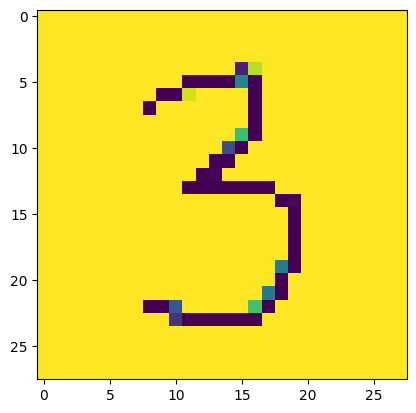

In [250]:
# train_x_out = np.reshape(image_in,[784,784])
train_x_out = image_in.flatten()
print(train_x_out.shape)

# #normalize the data
x_train_out = image_in.transpose()
print(x_train_out.shape)
plt.imshow(image_scaled)
plt.show()

In [ ]:
pred = predict(Theta1, Theta2,train_x_out )